# **Atividade** - Análise de Causalidade e Tipos de Teste

In [45]:
# Preparando o ambiente
!pip install pandas numpy seaborn matplotlib.pyplot scipy

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### **Exemplo 1**

Uma loja está avaliando se uma nova estratégia de marketing aumentou as
vendas. Eles comparam as vendas semanais de duas lojas: uma que adotou a nova estratégia (Grupo Experimental) e uma que não adotou (Grupo Controle).

**Pergunta:**
* Que tipo de teste está sendo utilizado?
* A diferença média nas vendas entre as lojas é significativa?

In [47]:
# Resolução feita em aula.

### **Exemplo 2**
Um fabricante de aparelhos quer verificar se a média de durabilidade (em horas) de uma nova bateria é igual ou maior que a durabilidade média esperada de 300 horas.

**Pergunta:**
* Que tipo de teste está sendo utilizado?
* A durabilidade média das baterias produzidas é significativamente diferente do valor esperado?

In [48]:
# Usaremos o teste de hipótese pois não será necessário utilizar mais de uma base de dados

np.random.seed(42)

# Tamanho das amostras
n = 100

# Dados do nosso conjunto de dados
durabilidade = np.random.normal(400, 150, n)

# Durabilidade esperada
durabilidade_esperada = 300

# Criando o dataframe
baterias = pd.DataFrame({'Durabilidade': durabilidade})

In [49]:
# Teste de hipótese
t_stat, p_value = stats.ttest_1samp(durabilidade, durabilidade_esperada)

# Imprimindo valores encontrados de T e P
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 6.197310233600613
P-value: 1.3240962620220987e-08


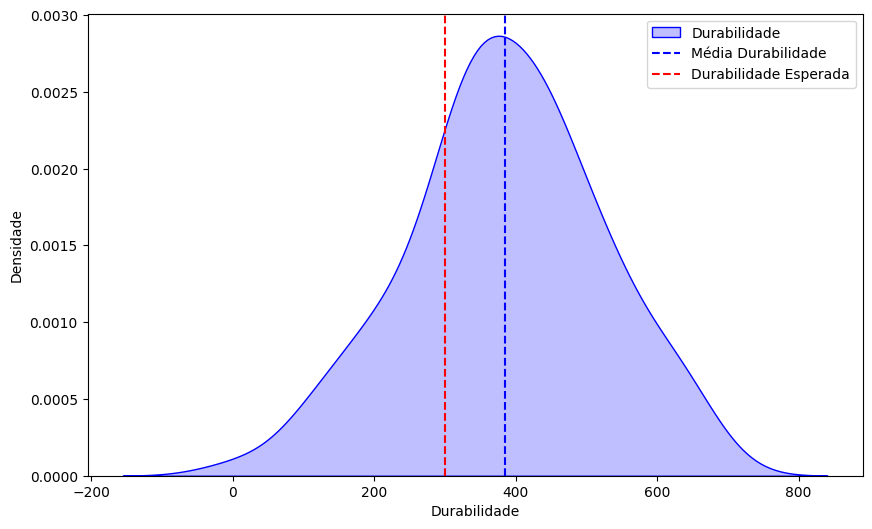

In [50]:
# Plotando gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(durabilidade, color='blue', label='Durabilidade', fill=True)
plt.axvline(np.mean(durabilidade), color='blue', linestyle='--', label='Média Durabilidade')
plt.axvline(durabilidade_esperada, color='red', linestyle='--', label='Durabilidade Esperada')
plt.xlabel('Durabilidade')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [51]:
alpha = 0.05
if (p_value / 2) < alpha and t_stat > 0:
    print("A durabilidade média das baterias é significativamente maior que 300 horas.")
else:
    print("Não há evidências suficientes para concluir que a durabilidade média é maior que 300 horas.")

A durabilidade média das baterias é significativamente maior que 300 horas.


### **Exemplo 3**
Uma academia quer analisar a eficácia de um novo programa de exercícios. Eles mediram o peso dos participantes antes e depois de um programa de 8 semanas.

**Pergunta:**
* Que tipo de teste está sendo utilizado?
* Houve uma redução significativa no peso dos participantes após o programa?

In [52]:
# Usaremos o teste T pois será necessário utilizar mais de uma base de dados
np.random.seed(42)

# Tamanho das amostras
n_inicial = 200
n_final = 200

# Dados do nosso conjunto de dados peso_inicial
peso_inicial = np.random.normal(150, 50, n_inicial)

# Dados do nosso conjunto de dados peso_final
peso_final = peso_inicial - np.random.normal(10, 15, n_final)

# Calcula a diminuição de peso
diminuição = peso_final - peso_inicial

# Criando o dataframe
dados = pd.DataFrame({'Peso Inicial': peso_inicial, 'Peso Final': peso_final, 'Diminuição': diminuição})

# Exibindo as primeiras linhas do DataFrame
dados.head()

,Peso Inicial,Peso Final,Diminuição
0,174.835708,159.468897,-15.366810
1,143.086785,124.675017,-18.411768
2,182.384427,156.138658,-26.245769
3,226.151493,200.344462,-25.807031
4,138.292331,148.957372,10.665041


C:\Users\guino\AppData\Local\Temp\ipykernel_1500\488092729.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dados['Peso Inicial'], dados['Peso Final'], dados['Diminuição']], labels=['Peso Inicial', 'Peso Final', 'Diminuição'])


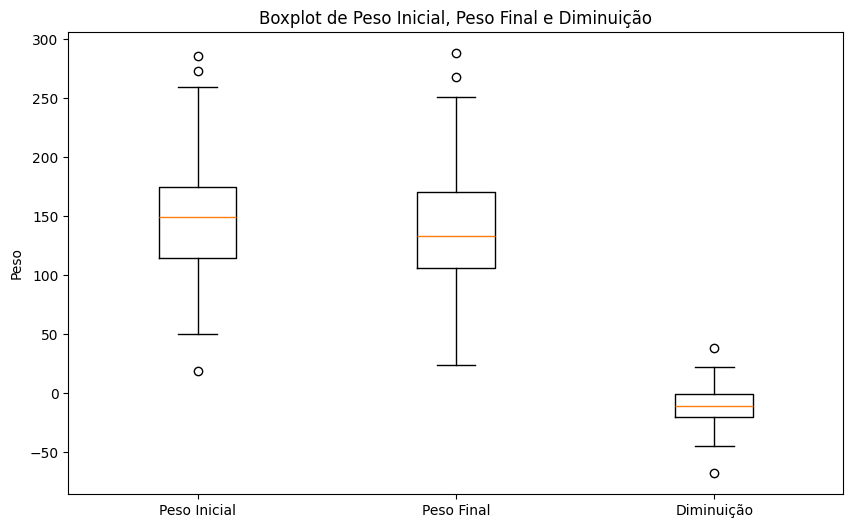

In [53]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([dados['Peso Inicial'], dados['Peso Final'], dados['Diminuição']], labels=['Peso Inicial', 'Peso Final', 'Diminuição'])
plt.ylabel('Peso')
plt.title('Boxplot de Peso Inicial, Peso Final e Diminuição')
plt.show()


### Teste de hipótese

* H0 = Não houve diminuição significativa no peso dos alunos ao final das pesagens
* H1 = Houve diminuição significativa no peso dos alunos ao final das pesagens


In [54]:
from scipy.stats import ttest_rel

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(dados['Peso Inicial'], dados['Peso Final'])

# Exibindo os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')


Estatística t: 10.78258243976603
Valor p: 1.2098389017800477e-21


In [55]:
# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Houve uma diminuição significativa no peso dos alunos (rejeitamos a hipótese nula).")
else:
    print("Não houve uma diminuição significativa no peso dos alunos (não rejeitamos a hipótese nula).")

Houve uma diminuição significativa no peso dos alunos (rejeitamos a hipótese nula).
